a90: LOgistic Regression w Python - Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

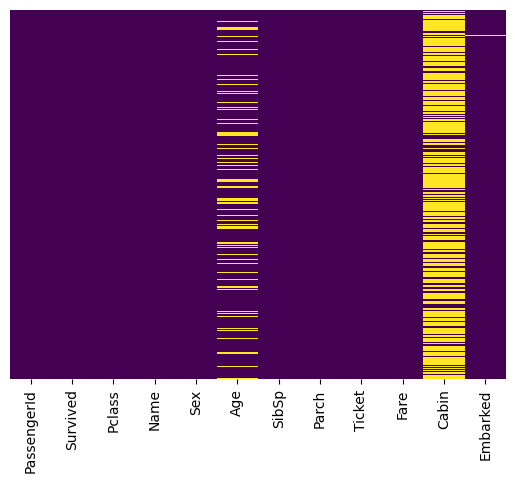

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
sns.set_style('darkgrid')

<Axes: xlabel='Survived', ylabel='count'>

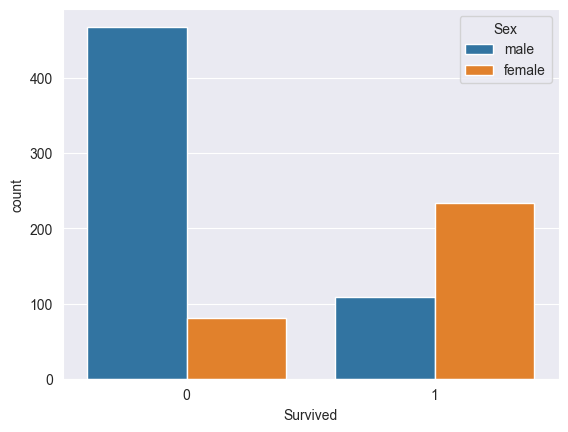

In [6]:
sns.countplot(x='Survived', data=train,hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

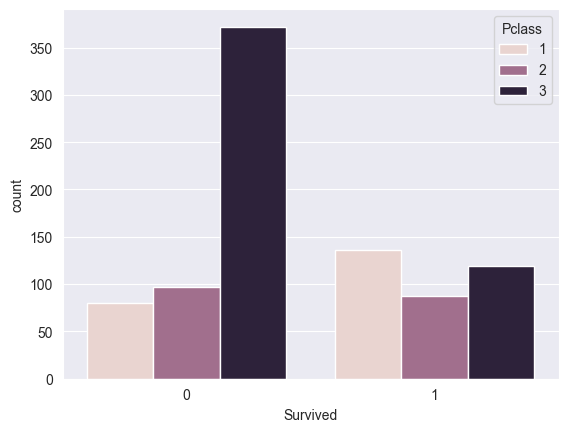

In [7]:
sns.countplot(x='Survived', data=train,hue='Pclass')

C:\Users\menez\AppData\Local\Temp\ipykernel_13988\2747699129.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,bins=30)


<Axes: xlabel='Age'>

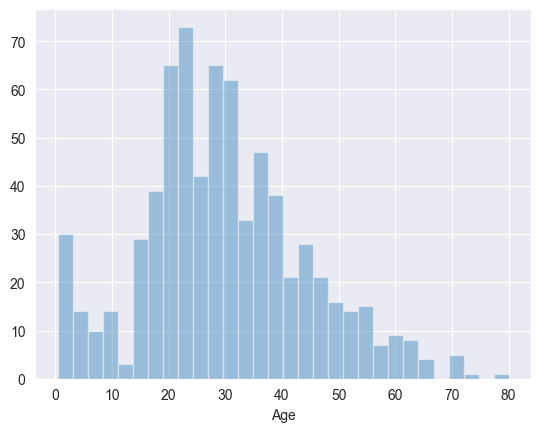

In [8]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<Axes: ylabel='Frequency'>

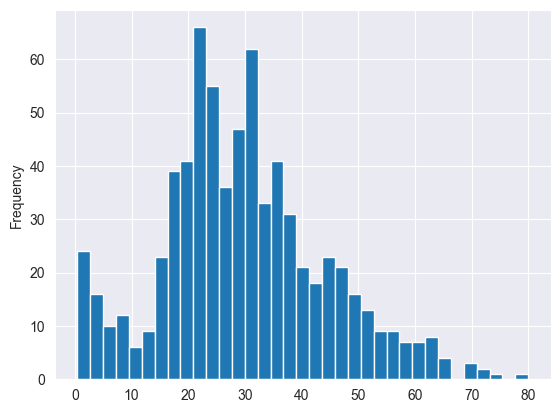

In [9]:
train['Age'].plot.hist(bins=35)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

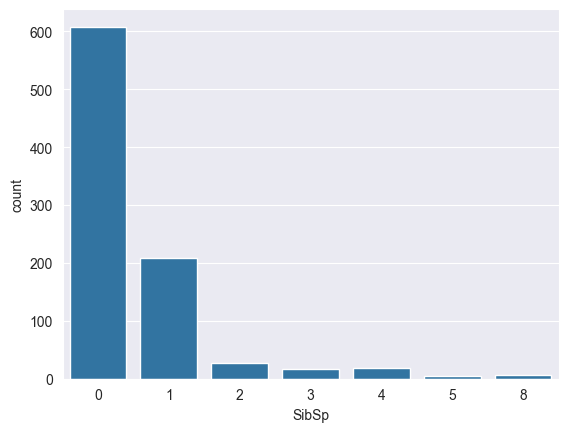

In [11]:
sns.countplot(x='SibSp',data=train)

<Axes: >

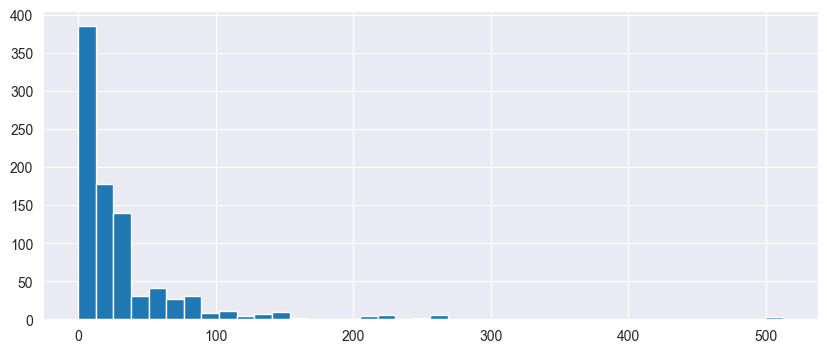

In [12]:
train['Fare'].hist(bins=40,figsize=(10,4))

a91: LOgistic Regression w Python - Part 2

Find the average age by class

<Axes: xlabel='Pclass', ylabel='Age'>

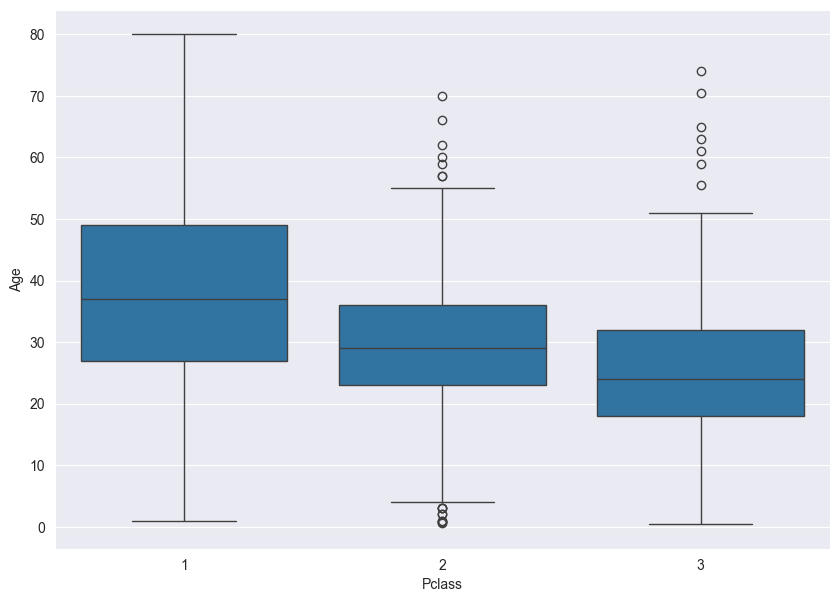

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
             return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\menez\AppData\Local\Temp\ipykernel_13988\3630759109.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\menez\AppData\Local\Temp\ipykernel_13988\3630759109.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

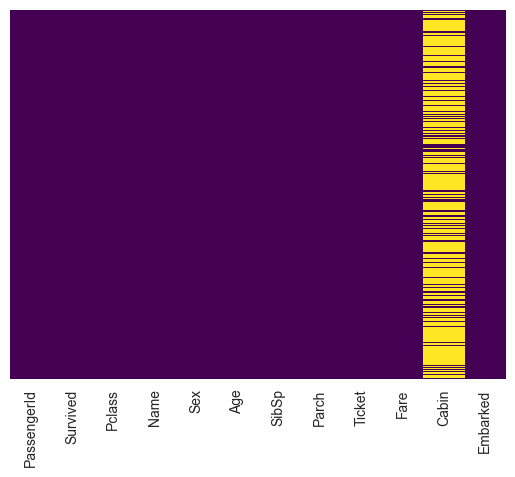

In [16]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [17]:
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

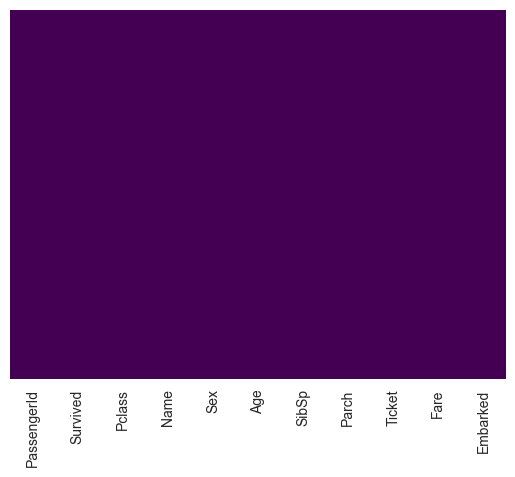

In [18]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

Make dummy variabless

In [22]:
sex = pd.get_dummies(train['Sex'], dtype=int, drop_first=True)

# Here one column is a perfect predictor of the othe column (female predicts male and vice versa)
# This is an issue known as multi-collinearity
# To avoid he use drop_first=True

In [24]:
embark = pd.get_dummies(train['Embarked'], dtype=int, drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
train = pd.concat([train,sex,embark], axis=1)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [26]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


In [27]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [ ]:
train.drop('PassengerId', axis=1, inplace=True)

In [ ]:
train.head()

# 

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


a92: LOgistic Regression w Python - Part 3

In [31]:
# Use the train has it was the full data_set... BUT, BUT, BUT
# We use de global mean to use in missing data, this is right? 
# We shouldn't have split in train and test, then make the mean for both data_sets?

In [32]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=400)

In [39]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [40]:
predictions = logmodel.predict(X_test)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test,predictions)

array([[134,  20],
       [ 38,  76]], dtype=int64)

In [ ]:
# Ways to increase your precision, recall oraccuracy
# Use train and test.csv
# Use Mr. and Mrs. containing in dataset or even the Ticket can have informations.